# Compare error metrics MAD and MSE

Both the mean absolute deviation (MAD) and the mean squared error (MSE) are popular choices for error metrics when evaluating predictions.
However, both of them have very different properties. In particular, the MSE emphasises outliers and puts a stronger penalty on these. This implies that the test samples which are further from the true values contribute more to the overall value of the metric than in the case of the MSE, i.e. these samples contribute more than samples which are not as far. 
While this behaviour might be useful in some cases, it's not ideal generally since relatively few samples contribute to the final value of the error metric compared to e.g. the MAD.

This notebook explores this behaviour based on some artificial data.

In [1]:
%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# generate some toy "truth" and "prediction"
# assume perfect prediction, just some Gaussian noise.
def generate_test_data(mean, noise, n_samples):
    y    = np.random.poisson(mean, n_samples)
    
    # take the absolute value as prediction - not ideal, as Poisson cannot become negative, 
    # in real scenarios one should dscuss carefully how to handle "impossible" predictions 
    yhat = np.abs(y + norm.rvs(scale=noise, size=n_samples))
    
    return y, yhat

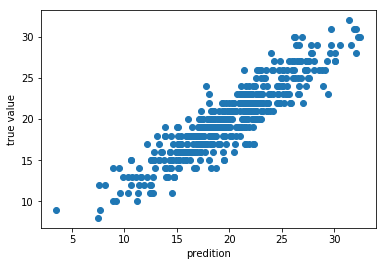

In [3]:
y, yhat = generate_test_data(mean=20, noise=2, n_samples=500)

#show the toy samples, the predictions are on the x-axis, the true values on the y axis
plt.scatter(yhat,y)
plt.xlabel('predition')
plt.ylabel('true value')
plt.show()

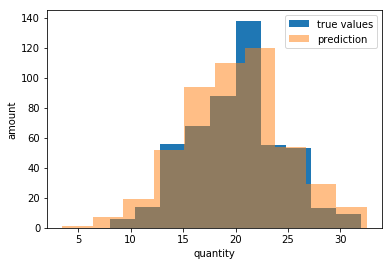

In [4]:
# now show the distribution of data in x and y 
plt.hist(y, label='true values')
plt.hist(yhat, alpha = 0.5, label='prediction')
plt.xlabel('quantity')
plt.ylabel('amount')
plt.legend()
plt.show()

In [6]:
df = pd.DataFrame({'yhat': yhat, 'y': y})
df['abs_err']     = np.abs(df['yhat'] - df['y'])
df['squared_err'] = np.square(df['yhat'] - df['y']) 

MAD = df['abs_err'].sum()/len(df)
MSE = df['squared_err'].sum()/len(df)

In [7]:
print("MAD = %.2lf" % MAD)
print("MSE = %.2lf" % MSE)

MAD = 1.59
MSE = 4.04


In [8]:
#fraction each value contributes to the full error
df['abs_err_frac'] = df['abs_err']/(len(df)*MAD)
df['squared_err_frac'] = df['squared_err']/(len(df)*MSE) 

In [9]:
df.sort_values('squared_err_frac')


,yhat,y,abs_err,squared_err,abs_err_frac,squared_err_frac
497,19.005020,19,0.005020,0.000025,0.000006,1.246270e-08
372,22.006866,22,0.006866,0.000047,0.000009,2.331134e-08
210,25.992539,26,0.007461,0.000056,0.000009,2.752552e-08
331,19.008767,19,0.008767,0.000077,0.000011,3.801232e-08
109,21.020711,21,0.020711,0.000429,0.000026,2.121304e-07
153,19.966817,20,0.033183,0.001101,0.000042,5.445158e-07
298,17.035937,17,0.035937,0.001291,0.000045,6.386422e-07
342,19.050121,19,0.050121,0.002512,0.000063,1.242314e-06
132,21.948779,22,0.051221,0.002624,0.000064,1.297438e-06
197,13.946357,14,0.053643,0.002878,0.000067,1.423047e-06


In [10]:
df2 = df.copy()

In [11]:
df2['squared_err_frac_sum'] = NaN
df2['abs_err_frac_sum']     = NaN

df2 = df2.sort_values('squared_err_frac', ascending=False)
for i in range(0,len(df2)):
    aggregate = df2.iloc[0:i]['squared_err_frac'].sum()
    df2['squared_err_frac_sum'].iloc[i] = aggregate

df2 = df2.sort_values('abs_err_frac', ascending=False)
for i in range(0,len(df2)):
    aggregate = df2.iloc[0:i]['abs_err_frac'].sum()
    df2['abs_err_frac_sum'].iloc[i] = aggregate    
    


/home/kerzel/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/kerzel/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


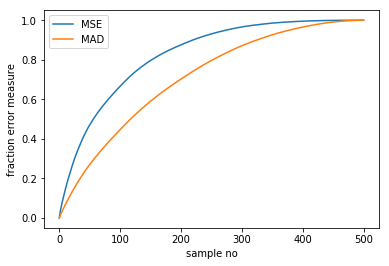

<Figure size 432x288 with 0 Axes>

In [12]:
x_space = np.linspace(0, len(df2), len(df2))
plt.plot(x_space, df2['squared_err_frac_sum'], label='MSE')  
plt.plot(x_space, df2['abs_err_frac_sum'],     label='MAD')  
plt.xlabel('sample no')
plt.ylabel('fraction error measure')
plt.legend()
plt.show()
plt.savefig('MAD_vs_MSE.png')